To start, we import any packages we will need for this analysis

In [1]:
!pip install seaborn
!pip install pingouin


     |████████████████████████████████| 283 kB 17.7 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 223 kB 18.1 MB/s 
     |████████████████████████████████| 9.5 MB 51.4 MB/s 
     |████████████████████████████████| 231 kB 101.1 MB/s 
     |████████████████████████████████| 720 kB 90.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-py3-none-any.whl size=221687 sha256=0521e9b6d2324ff7494e57413bc20d2b0fdf7dbf9ee620f396396b61ba210884
  Stored in directory: /home/jovyan/.cache/pip/wheels/2c/1c/b9/4b0d55135badf2f2e1b12ab1cd1747a950be8bcd5380280b8e
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4963 sha256=a9c6cd09208d57a3e4120c6983809fcd4161a19565228f621beb0b610906948b
  Stored in directory: /home/jovyan/.cache/pip/wheels/6f/cd/a2/e49170b2cf59e88b952f3414f25a54d9f16f033bded4aaab26
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.w

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

Before I begin any sort of analysis, I ran a regression on Excel for all the statistics I could find on Pro Football reference. Basically, I looked at which statistics were important predictors of wins. Then, I saved the regression as a CSV and imported the data to Deepnote.

In [3]:
excel_regression_df = pd.read_csv("Excel Regression.csv", header=0)
excel_regression_df

,Variable Name,Coefficients,Standard Error,t Stat,P-value,Lower 95%,Upper 95%,Lower 95.0%,Upper 95.0%
0,Passing Completions,0.048998,0.044973,1.089498,0.285930,-0.043445,0.141441,-0.043445,0.141441
1,Passing Attempts,0.040142,0.088880,0.451640,0.655273,-0.142554,0.222838,-0.142554,0.222838
2,Passing Yards,0.002306,0.002112,1.091844,0.284916,-0.002035,0.006646,-0.002035,0.006646
3,Intended Air Yards,-0.011906,0.010507,-1.133129,0.267501,-0.033504,0.009692,-0.033504,0.009692
4,Intended Air Yards per Pass Attempt,6.614189,5.726683,1.154977,0.258605,-5.157177,18.385555,-5.157177,18.385555
...,...,...,...,...,...,...,...,...,...
158,Total Draft Kings Points Allowed vs WR,0.363339,0.890170,0.408168,0.687487,-1.493523,2.220201,-1.493523,2.220201
159,Total FanDuel Points Allowed vs WR,-0.763261,1.226853,-0.622129,0.540885,-3.322431,1.795909,-3.322431,1.795909
160,Total Fantasy Points Allowed Per Game vs WR,-3.389794,19.521177,-0.173647,0.863888,-44.110255,37.330667,-44.110255,37.330667
161,Total DraftKings Allowed Per Game vs WR,-4.888109,13.684942,-0.357189,0.724692,-33.434397,23.658179,-33.434397,23.658179


To get an idea of signifigiant indicators for wins in football, I created another variable which basically said if the p-value was below 0.1 (My created confidence level). If the statistic was below 0.1, the row for this column would say true, saying that the statistic was an importnat predictor of wins in football

In [4]:
Indicator_of_wins = excel_regression_df['P-value'] < 0.1
excel_regression_df['Indicator of Wins'] = Indicator_of_wins
excel_regression_df

,Variable Name,Coefficients,Standard Error,t Stat,P-value,Lower 95%,Upper 95%,Lower 95.0%,Upper 95.0%,Indicator of Wins
0,Passing Completions,0.048998,0.044973,1.089498,0.285930,-0.043445,0.141441,-0.043445,0.141441,False
1,Passing Attempts,0.040142,0.088880,0.451640,0.655273,-0.142554,0.222838,-0.142554,0.222838,False
2,Passing Yards,0.002306,0.002112,1.091844,0.284916,-0.002035,0.006646,-0.002035,0.006646,False
3,Intended Air Yards,-0.011906,0.010507,-1.133129,0.267501,-0.033504,0.009692,-0.033504,0.009692,False
4,Intended Air Yards per Pass Attempt,6.614189,5.726683,1.154977,0.258605,-5.157177,18.385555,-5.157177,18.385555,False
...,...,...,...,...,...,...,...,...,...,...
158,Total Draft Kings Points Allowed vs WR,0.363339,0.890170,0.408168,0.687487,-1.493523,2.220201,-1.493523,2.220201,False
159,Total FanDuel Points Allowed vs WR,-0.763261,1.226853,-0.622129,0.540885,-3.322431,1.795909,-3.322431,1.795909,False
160,Total Fantasy Points Allowed Per Game vs WR,-3.389794,19.521177,-0.173647,0.863888,-44.110255,37.330667,-44.110255,37.330667,False
161,Total DraftKings Allowed Per Game vs WR,-4.888109,13.684942,-0.357189,0.724692,-33.434397,23.658179,-33.434397,23.658179,False


Now, time to load in the CSV's. I uploaded a total of 7 CSV's with advanced offensive statistics, advanced defensive statistics and other important statistics like Point Differental.

First, I uploaded a CSV for Advanced Air Passing Yards. I rename the cokumns to make reading the data easier before also removing the games column at it's needless (and redundant as each team plays 16 games).

In [5]:
advanced_passing_air_yards_df = pd.read_csv("Passing CSV 1.csv", header=1)
advanced_passing_air_yards_df = advanced_passing_air_yards_df.rename(columns={'Cmp': 'Passing Cmps', 'Att': 'Passing Attempts', 'Yds': 'Passing Yards', 'IAY': 'Intended Air Yards', 'IAY/PA': 'Intended Air Yards Per Attempt', 'CAY': 'Completed Air Yards', 'CAY/Cmp': 'Completed Air Yards Per Cmp', 'CAY/PA': 'Completed Air Yards Per Attempt', 'YAC': 'Passing YAC'})
remove_columns = ['G']
advanced_passing_air_yards_df = advanced_passing_air_yards_df.drop(remove_columns, axis=1)
advanced_passing_air_yards_df

,Tm,Passing Cmps,Passing Attempts,Passing Yards,Intended Air Yards,Intended Air Yards Per Attempt,Completed Air Yards,Completed Air Yards Per Cmp,Completed Air Yards Per Attempt,Passing YAC,YAC/Cmp
0,Arizona Cardinals,355,554,3477,4127,7.4,1911,5.4,3.4,1566,4.4
1,Atlanta Falcons,459,684,4714,5493,8.0,3126,6.8,4.6,1588,3.5
2,Baltimore Ravens,289,440,3225,3822,8.7,1903,6.6,4.3,1322,4.6
3,Buffalo Bills,299,513,3229,4690,9.1,1982,6.6,3.9,1247,4.2
4,Carolina Panthers,382,633,3650,5275,8.3,2076,5.4,3.3,1574,4.1
5,Chicago Bears,371,580,3291,4533,7.8,2029,5.5,3.5,1262,3.4
6,Cincinnati Bengals,356,616,3652,4735,7.7,2137,6.0,3.5,1515,4.3
7,Cleveland Browns,318,539,3554,4628,8.6,2022,6.4,3.8,1532,4.8
8,Dallas Cowboys,388,597,4751,5539,9.3,2984,7.7,5.0,1767,4.6
9,Denver Broncos,312,504,3115,3483,6.9,1697,5.4,3.4,1418,4.5


Next, I imported a CSV with advanced passing accuracy data. I renamed the columns to make the data less messy, and removed some of the columns also in the air yards dataframe as we wouldn't need them twice.

In [6]:
advanced_passing_accuracy_df = pd.read_csv("Passing CSV 2.csv", header=1)
advanced_passing_accuracy_df = advanced_passing_accuracy_df.rename(columns={'Bats': 'Passes Batted', 'ThAwy': 'Passes Thrown Away', 'BadTh': 'Bad Throws', 'OnTgt': 'Passes On Target'})
remove_columns2 = ['G', 'Cmp', 'Att', 'Yds']
advanced_passing_accuracy_df = advanced_passing_accuracy_df.drop(remove_columns2, axis=1)
advanced_passing_accuracy_df

,Tm,Passes Batted,Passes Thrown Away,Spikes,Drops,Drop%,Bad Throws,Bad%,Passes On Target,OnTgt%
0,Arizona Cardinals,18,24,4,18,3.40%,93,17.70%,386,73.40%
1,Atlanta Falcons,19,28,3,17,2.60%,96,14.70%,494,75.70%
2,Baltimore Ravens,14,12,2,14,3.30%,74,17.40%,322,75.60%
3,Buffalo Bills,13,25,4,36,7.40%,97,20.00%,352,72.70%
4,Carolina Panthers,17,31,2,33,5.50%,115,19.20%,438,73.00%
5,Chicago Bears,9,7,3,32,5.60%,102,17.90%,428,75.10%
6,Cincinnati Bengals,16,20,7,31,5.30%,111,18.80%,415,70.50%
7,Cleveland Browns,20,20,2,31,6.00%,93,18.00%,365,70.60%
8,Dallas Cowboys,9,15,1,36,6.20%,86,14.80%,451,77.60%
9,Denver Broncos,12,25,1,27,5.60%,85,17.80%,358,74.90%


Additionally, we added data for advanced statistics. We renamed the columns appropriately and removed the Games column.

In [7]:
advanced_rushing_df = pd.read_csv("Rushing CSV 1.csv", header=0)
remove_columns3 = ['G']
advanced_rushing_df = advanced_rushing_df.rename(columns={'Att': 'Rushing Attempts', 'Yds': 'Rushing Yds', '1D': 'Rushing Yards', 'YBC': 'Rushing YBC', 'YAC': 'Rushing YAC', 'BrkTkl': 'Rushing BrkTkl', 'Att/Br': 'Attempts Per BrkTkl'})
advanced_rushing_df = advanced_rushing_df.drop(remove_columns3, axis=1)
advanced_rushing_df

,Tm,Rushing Attempts,Rushing Yds,Rushing Yards,Rushing YBC,YBC/Att,Rushing YAC,YAC/Att,Rushing BrkTkl,Attempts Per BrkTkl
0,Arizona Cardinals,396,1990,109,1289,3.3,701,1.8,23,17.2
1,Atlanta Falcons,362,1361,84,801,2.2,560,1.5,17,21.3
2,Baltimore Ravens,596,3296,188,1936,3.2,1360,2.3,32,18.6
3,Buffalo Bills,465,2054,120,1030,2.2,1024,2.2,40,11.6
4,Carolina Panthers,386,1819,82,1205,3.1,614,1.6,21,18.4
5,Chicago Bears,395,1458,85,893,2.3,565,1.4,41,9.6
6,Cincinnati Bengals,385,1517,85,714,1.9,803,2.1,31,12.4
7,Cleveland Browns,393,1901,90,851,2.2,1050,2.7,39,10.1
8,Dallas Cowboys,449,2153,120,1041,2.3,1112,2.5,41,11.0
9,Denver Broncos,409,1662,76,963,2.4,699,1.7,40,10.2


Furthermore, we added advanced receiving statistics, while renaming columns and removing columns as needed.

In [8]:
advanced_receiving_df = pd.read_csv("Receiving CSV 1.csv", header=0)
advanced_receiving_df = advanced_receiving_df.rename(columns={'Yds':'Receiving Yards', 'TD':'Receiving TDs', '1D': 'Receiving 1Ds', 'YBC': 'Receiving YBC', 'BrkTkl': 'Receiving BrkTkl', 'Rec/Br': 'Receptions Per BrkTkl'})
remove_columns4 = ['G', 'ADOT', 'Int', 'Rat']
advanced_receiving_df = advanced_receiving_df.drop(remove_columns4, axis=1)
advanced_receiving_df

,Tm,Tgt,Rec,Receiving Yards,Receiving TDs,Receiving 1Ds,Receiving YBC,YBC/R,YAC,YAC/R,Receiving BrkTkl,Receptions Per BrkTkl,Drop,Drop%
0,Arizona Cardinals,554,355,3797,20,176,1918,5.4,1879,5.3,16,22.2,18,3.2
1,Atlanta Falcons,684,459,5049,29,258,3128,6.8,1921,4.2,22,20.9,17,2.5
2,Baltimore Ravens,440,289,3350,37,171,1903,6.6,1447,5.0,11,26.3,14,3.2
3,Buffalo Bills,513,299,3476,21,162,1977,6.6,1499,5.0,20,15.0,36,7.0
4,Carolina Panthers,633,382,4134,17,230,2076,5.4,2058,5.4,26,14.7,33,5.2
5,Chicago Bears,580,371,3573,20,178,2035,5.5,1538,4.1,25,14.8,32,5.5
6,Cincinnati Bengals,616,356,3994,18,191,2137,6.0,1857,5.2,22,16.2,31,5.0
7,Cleveland Browns,539,318,3847,22,180,2022,6.4,1825,5.7,26,12.2,31,5.8
8,Dallas Cowboys,597,388,4902,30,229,2984,7.7,1918,4.9,25,15.5,36,6.0
9,Denver Broncos,504,312,3401,16,162,1700,5.4,1701,5.5,25,12.5,27,5.4


Lastly, in terms of advacned statistics, we removed and renamed columns as needed.

In [9]:
advanced_defense_df = pd.read_csv("Defense CSV 1.csv", header=0)
advanced_defense_df = advanced_defense_df.rename(columns={'Att': 'Opponents Attempts', 'Cmp': 'Opponents Cmps', 'Yds': 'Opponents Yards', 'TD': 'Opponents TDs', 'DADOT': 'Average Depth of Target', 'Air': 'Air Yards Allowed', 'YAC': 'YAC Allowed', 'Bltz': 'Blitzes', 'Bltz%': 'Blitz%', 'Hrry': 'QB Hurries', 'Hrry%': 'QB Hurry %', 'QBKD': 'QB Knockdowns', 'QBKD%': 'QB Knockdown%', 'Sk': 'Sacks', 'Prss': 'QB Pressures', 'Prss%': 'QB Pressure%', 'MTkl': 'Missed Tackles'})
remove_columns5 = ['G']
advanced_defense_df = advanced_defense_df.drop(remove_columns5, axis=1)
advanced_defense_df

,Tm,Opponents Attempts,Opponents Cmps,Opponents Yards,Opponents TDs,Average Depth of Target,Air Yards Allowed,YAC Allowed,Blitzes,Blitz%,QB Hurries,QB Hurry %,QB Knockdowns,QB Knockdown%,Sacks,QB Pressures,QB Pressure%,Missed Tackles
0,Arizona Cardinals,601,421,4510,38,7.4,2461,2152,267,39.70%,52,7.70%,44,7.30%,40,136,20.20%,135
1,Atlanta Falcons,536,351,3918,28,7.9,2311,2012,145,24.50%,52,8.80%,29,5.40%,28,109,18.40%,95
2,Baltimore Ravens,544,318,3315,15,8.9,1916,1621,329,54.90%,44,7.30%,59,10.80%,37,140,23.40%,93
3,Buffalo Bills,553,348,3123,15,7.1,1835,1553,191,31.10%,58,9.40%,41,7.40%,44,143,23.30%,132
4,Carolina Panthers,544,347,3696,21,9.1,2354,1752,167,26.90%,57,9.20%,46,8.50%,53,156,25.20%,109
5,Chicago Bears,571,362,3554,17,7.2,2147,1642,146,23.50%,80,12.90%,45,7.90%,32,157,25.20%,100
6,Cincinnati Bengals,499,308,3917,25,9.0,2341,1921,183,32.50%,50,8.90%,48,9.60%,31,129,22.90%,109
7,Cleveland Browns,513,318,3470,25,9.1,2167,1692,221,38.20%,62,10.70%,38,7.40%,38,138,23.80%,140
8,Dallas Cowboys,569,370,3576,21,7.3,1901,1951,148,23.20%,61,9.60%,49,8.60%,39,149,23.40%,119
9,Denver Broncos,537,348,3609,19,7.8,2132,1710,144,24.10%,62,10.40%,35,6.50%,40,137,22.90%,96


In [10]:
afc_csv = pd.read_csv('AFC.csv', header=0)
afc_csv = afc_csv.rename(columns={'W': 'Wins', 'L': 'Losses', 'T': 'Ties', 'W-L%': 'Win %', 'PF': 'Points For', 'PA': 'Points Against', 'PD': 'Point Differential', 'MoV': 'Average Margin of Victory', 'SoS': 'Strength of Schedule', 'SRS': 'Simple Rating System', 'OSRS': 'Offensive Simple Rating System', 'DSRS': 'Defensive Simple rating System'})
afc_csv

,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple rating System
0,New England Patriots,12,4,0,0.750,420,225,195,12.2,-1.8,10.4,2.8,7.6
1,Buffalo Bills,10,6,0,0.625,314,259,55,3.4,-1.3,2.2,-3.5,5.7
2,New York Jets,7,9,0,0.438,276,359,-83,-5.2,-1.1,-6.3,-5.7,-0.6
3,Miami Dolphins,5,11,0,0.313,306,494,-188,-11.8,0.2,-11.6,-2.4,-9.1
4,Baltimore Ravens,14,2,0,0.875,531,282,249,15.6,0.1,15.6,11.0,4.7
5,Pittsburgh Steelers,8,8,0,0.500,289,303,-14,-0.9,1.2,0.3,-4.3,4.6
6,Cleveland Browns,6,10,0,0.375,335,393,-58,-3.6,1.7,-1.9,-0.4,-1.5
7,Cincinnati Bengals,2,14,0,0.125,279,420,-141,-8.8,1.5,-7.3,-4.4,-2.9
8,Houston Texans,10,6,0,0.625,378,385,-7,-0.4,1.0,0.5,1.0,-0.5
9,Tennessee Titans,9,7,0,0.563,402,331,71,4.4,-1.0,3.4,1.8,1.7


In [11]:
nfc_csv = pd.read_csv('NFC.csv', header=0)
nfc_csv = nfc_csv.rename(columns={'W': 'Wins', 'L': 'Losses', 'T': 'Ties', 'W-L%': 'Win %', 'PF': 'Points For', 'PA': 'Points Against', 'PD': 'Point Differential', 'MoV': 'Average Margin of Victory', 'SoS': 'Strength of Schedule', 'SRS': 'Simple Rating System', 'OSRS': 'Offensive Simple Rating System', 'DSRS': 'Defensive Simple rating System'})
nfc_csv

,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple rating System
0,Philadelphia Eagles,9,7,0,0.563,385,354,31,1.9,-1.7,0.3,0.7,-0.4
1,Dallas Cowboys,8,8,0,0.500,434,321,113,7.1,-1.8,5.3,3.8,1.5
2,New York Giants,4,12,0,0.250,341,451,-110,-6.9,-1.0,-7.9,-1.8,-6.1
3,Washington Redskins,3,13,0,0.188,266,435,-169,-10.6,-0.2,-10.8,-6.3,-4.5
4,Green Bay Packers,13,3,0,0.813,376,313,63,3.9,-0.7,3.2,0.6,2.6
5,Minnesota Vikings,10,6,0,0.625,407,303,104,6.5,-1.1,5.4,2.5,2.9
6,Chicago Bears,8,8,0,0.500,280,298,-18,-1.1,0.2,-0.9,-5.4,4.5
7,Detroit Lions,3,12,1,0.219,341,423,-82,-5.1,-0.1,-5.2,-1.2,-4.0
8,New Orleans Saints,13,3,0,0.813,458,341,117,7.3,0.0,7.4,5.0,2.3
9,Atlanta Falcons,7,9,0,0.438,381,399,-18,-1.1,1.1,-0.1,0.3,-0.4


Finally after uploading and cleaning all the CSV's, we begin the process of merging them together. First, we merge the AFC and NFC dataframes. We use the concat function as each dataframe has only half of the teams in the league, and we want to combine the dataframes vertically.

In [12]:
both_conferences_df = pd.concat([afc_csv, nfc_csv], ignore_index=True)
both_conferences_df

,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple rating System
0,New England Patriots,12,4,0,0.750,420,225,195,12.2,-1.8,10.4,2.8,7.6
1,Buffalo Bills,10,6,0,0.625,314,259,55,3.4,-1.3,2.2,-3.5,5.7
2,New York Jets,7,9,0,0.438,276,359,-83,-5.2,-1.1,-6.3,-5.7,-0.6
3,Miami Dolphins,5,11,0,0.313,306,494,-188,-11.8,0.2,-11.6,-2.4,-9.1
4,Baltimore Ravens,14,2,0,0.875,531,282,249,15.6,0.1,15.6,11.0,4.7
5,Pittsburgh Steelers,8,8,0,0.500,289,303,-14,-0.9,1.2,0.3,-4.3,4.6
6,Cleveland Browns,6,10,0,0.375,335,393,-58,-3.6,1.7,-1.9,-0.4,-1.5
7,Cincinnati Bengals,2,14,0,0.125,279,420,-141,-8.8,1.5,-7.3,-4.4,-2.9
8,Houston Texans,10,6,0,0.625,378,385,-7,-0.4,1.0,0.5,1.0,-0.5
9,Tennessee Titans,9,7,0,0.563,402,331,71,4.4,-1.0,3.4,1.8,1.7


Merge all advanced stats DF's together

In [13]:
advanced_passing_df = pd.merge(advanced_passing_air_yards_df, advanced_passing_accuracy_df, on='Tm')
advanced_passing_and_rushing_df = pd.merge(advanced_passing_df, advanced_rushing_df)
advanced_offensive_df = pd.merge(advanced_passing_and_rushing_df, advanced_receiving_df, on='Tm')
all_advanced_stats_df = pd.merge(advanced_offensive_df, advanced_defense_df, on='Tm')
all_advanced_stats_df

,Tm,Passing Cmps,Passing Attempts,Passing Yards,Intended Air Yards,Intended Air Yards Per Attempt,Completed Air Yards,Completed Air Yards Per Cmp,Completed Air Yards Per Attempt,Passing YAC,...,Blitzes,Blitz%,QB Hurries,QB Hurry %,QB Knockdowns,QB Knockdown%,Sacks,QB Pressures,QB Pressure%,Missed Tackles
0,Arizona Cardinals,355,554,3477,4127,7.4,1911,5.4,3.4,1566,...,267,39.70%,52,7.70%,44,7.30%,40,136,20.20%,135
1,Atlanta Falcons,459,684,4714,5493,8.0,3126,6.8,4.6,1588,...,145,24.50%,52,8.80%,29,5.40%,28,109,18.40%,95
2,Baltimore Ravens,289,440,3225,3822,8.7,1903,6.6,4.3,1322,...,329,54.90%,44,7.30%,59,10.80%,37,140,23.40%,93
3,Buffalo Bills,299,513,3229,4690,9.1,1982,6.6,3.9,1247,...,191,31.10%,58,9.40%,41,7.40%,44,143,23.30%,132
4,Carolina Panthers,382,633,3650,5275,8.3,2076,5.4,3.3,1574,...,167,26.90%,57,9.20%,46,8.50%,53,156,25.20%,109
5,Chicago Bears,371,580,3291,4533,7.8,2029,5.5,3.5,1262,...,146,23.50%,80,12.90%,45,7.90%,32,157,25.20%,100
6,Cincinnati Bengals,356,616,3652,4735,7.7,2137,6.0,3.5,1515,...,183,32.50%,50,8.90%,48,9.60%,31,129,22.90%,109
7,Cleveland Browns,318,539,3554,4628,8.6,2022,6.4,3.8,1532,...,221,38.20%,62,10.70%,38,7.40%,38,138,23.80%,140
8,Dallas Cowboys,388,597,4751,5539,9.3,2984,7.7,5.0,1767,...,148,23.20%,61,9.60%,49,8.60%,39,149,23.40%,119
9,Denver Broncos,312,504,3115,3483,6.9,1697,5.4,3.4,1418,...,144,24.10%,62,10.40%,35,6.50%,40,137,22.90%,96


Finally, we merge together the 2 main data frames we have left, the one with the advanced analytics and the one with team records and other statistics. We merge them together using pd.merge() with the both conferences data frame first, so the wins can be the column next to teams (which makes organization easier.)

In [14]:
main_football_df = pd.merge(both_conferences_df, all_advanced_stats_df, on='Tm')
main_football_df 

,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,...,Blitzes,Blitz%,QB Hurries,QB Hurry %,QB Knockdowns,QB Knockdown%,Sacks,QB Pressures,QB Pressure%,Missed Tackles
0,New England Patriots,12,4,0,0.750,420,225,195,12.2,-1.8,...,225,37.10%,58,9.60%,41,7.60%,47,146,24.10%,66
1,Buffalo Bills,10,6,0,0.625,314,259,55,3.4,-1.3,...,191,31.10%,58,9.40%,41,7.40%,44,143,23.30%,132
2,New York Jets,7,9,0,0.438,276,359,-83,-5.2,-1.1,...,254,39.20%,50,7.70%,52,8.90%,35,137,21.10%,96
3,Miami Dolphins,5,11,0,0.313,306,494,-188,-11.8,0.2,...,182,31.60%,35,6.10%,37,6.80%,23,95,16.50%,115
4,Baltimore Ravens,14,2,0,0.875,531,282,249,15.6,0.1,...,329,54.90%,44,7.30%,59,10.80%,37,140,23.40%,93
5,Pittsburgh Steelers,8,8,0,0.500,289,303,-14,-0.9,1.2,...,218,36.90%,70,11.80%,56,10.90%,54,180,30.50%,106
6,Cleveland Browns,6,10,0,0.375,335,393,-58,-3.6,1.7,...,221,38.20%,62,10.70%,38,7.40%,38,138,23.80%,140
7,Cincinnati Bengals,2,14,0,0.125,279,420,-141,-8.8,1.5,...,183,32.50%,50,8.90%,48,9.60%,31,129,22.90%,109
8,Houston Texans,10,6,0,0.625,378,385,-7,-0.4,1.0,...,213,32.90%,44,6.80%,42,7.20%,31,117,18.10%,115
9,Tennessee Titans,9,7,0,0.563,402,331,71,4.4,-1.0,...,166,24.60%,72,10.70%,27,4.50%,43,142,21.10%,110


Here, we do some final cleaning of the dataframe by renaming some columns and deleting a duplicate column.

In [15]:
main_football_df = main_football_df.rename(columns={'Bad%': 'Bad Throw %', 'Rushing Yards': 'Rushing Yards Per Game', 'Drop%_y': 'Drop %'})
remove_columns6 = ['Drops'] #I also dropped the duplicate Drop%_x colum (However, you cannot remove the column twice)
main_football_df = main_football_df.drop(remove_columns6, axis=1)
main_football_df

,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,...,Blitzes,Blitz%,QB Hurries,QB Hurry %,QB Knockdowns,QB Knockdown%,Sacks,QB Pressures,QB Pressure%,Missed Tackles
0,New England Patriots,12,4,0,0.750,420,225,195,12.2,-1.8,...,225,37.10%,58,9.60%,41,7.60%,47,146,24.10%,66
1,Buffalo Bills,10,6,0,0.625,314,259,55,3.4,-1.3,...,191,31.10%,58,9.40%,41,7.40%,44,143,23.30%,132
2,New York Jets,7,9,0,0.438,276,359,-83,-5.2,-1.1,...,254,39.20%,50,7.70%,52,8.90%,35,137,21.10%,96
3,Miami Dolphins,5,11,0,0.313,306,494,-188,-11.8,0.2,...,182,31.60%,35,6.10%,37,6.80%,23,95,16.50%,115
4,Baltimore Ravens,14,2,0,0.875,531,282,249,15.6,0.1,...,329,54.90%,44,7.30%,59,10.80%,37,140,23.40%,93
5,Pittsburgh Steelers,8,8,0,0.500,289,303,-14,-0.9,1.2,...,218,36.90%,70,11.80%,56,10.90%,54,180,30.50%,106
6,Cleveland Browns,6,10,0,0.375,335,393,-58,-3.6,1.7,...,221,38.20%,62,10.70%,38,7.40%,38,138,23.80%,140
7,Cincinnati Bengals,2,14,0,0.125,279,420,-141,-8.8,1.5,...,183,32.50%,50,8.90%,48,9.60%,31,129,22.90%,109
8,Houston Texans,10,6,0,0.625,378,385,-7,-0.4,1.0,...,213,32.90%,44,6.80%,42,7.20%,31,117,18.10%,115
9,Tennessee Titans,9,7,0,0.563,402,331,71,4.4,-1.0,...,166,24.60%,72,10.70%,27,4.50%,43,142,21.10%,110


Next, we will add an expected wins column to the data frame.

You may ask what is expected wins? Firstly used in baseball, expected wins are calculated using a teams projected points/runs scored and against. Theoretically, the percentage you should get from the formula should be a team's true winning percentage. Below, I linked a YouTube video that explains the concept pretty well. 

https://www.youtube.com/watch?v=ZWdyBbgGZBQ

To see a team's expected wins, we will add a column in to calculate a team's expected wins from the 2019 season and see how well they actually were.

In [16]:
expected_wins = (main_football_df['Points For']**(2.37) / ((main_football_df['Points For']**2.37) + (main_football_df['Points Against']**2.37)))
expected_wins = expected_wins*16 #We multiply by 16 because expected wins would be winning percentage by games played
expected_wins


0     13.031338
1      9.794477
2      5.585140
3      3.891502
4     13.080872
5      7.552007
6      6.504054
7      4.399901
8      7.826078
9      9.810394
10     7.690155
11     5.437594
12    11.387811
13     6.927341
14     5.340072
15     7.777642
16     8.793197
17    10.743375
18     5.442435
19     3.802177
20     9.711639
21    10.688665
22     7.410430
23     6.000431
24    10.687877
25     7.562820
26     8.188108
27     5.072754
28    11.794543
29     8.165261
30     8.748591
31     6.116927
dtype: float64

In [17]:
main_football_df['Expected Wins'] = expected_wins 
main_football_df


,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,...,Blitz%,QB Hurries,QB Hurry %,QB Knockdowns,QB Knockdown%,Sacks,QB Pressures,QB Pressure%,Missed Tackles,Expected Wins
0,New England Patriots,12,4,0,0.750,420,225,195,12.2,-1.8,...,37.10%,58,9.60%,41,7.60%,47,146,24.10%,66,13.031338
1,Buffalo Bills,10,6,0,0.625,314,259,55,3.4,-1.3,...,31.10%,58,9.40%,41,7.40%,44,143,23.30%,132,9.794477
2,New York Jets,7,9,0,0.438,276,359,-83,-5.2,-1.1,...,39.20%,50,7.70%,52,8.90%,35,137,21.10%,96,5.585140
3,Miami Dolphins,5,11,0,0.313,306,494,-188,-11.8,0.2,...,31.60%,35,6.10%,37,6.80%,23,95,16.50%,115,3.891502
4,Baltimore Ravens,14,2,0,0.875,531,282,249,15.6,0.1,...,54.90%,44,7.30%,59,10.80%,37,140,23.40%,93,13.080872
5,Pittsburgh Steelers,8,8,0,0.500,289,303,-14,-0.9,1.2,...,36.90%,70,11.80%,56,10.90%,54,180,30.50%,106,7.552007
6,Cleveland Browns,6,10,0,0.375,335,393,-58,-3.6,1.7,...,38.20%,62,10.70%,38,7.40%,38,138,23.80%,140,6.504054
7,Cincinnati Bengals,2,14,0,0.125,279,420,-141,-8.8,1.5,...,32.50%,50,8.90%,48,9.60%,31,129,22.90%,109,4.399901
8,Houston Texans,10,6,0,0.625,378,385,-7,-0.4,1.0,...,32.90%,44,6.80%,42,7.20%,31,117,18.10%,115,7.826078
9,Tennessee Titans,9,7,0,0.563,402,331,71,4.4,-1.0,...,24.60%,72,10.70%,27,4.50%,43,142,21.10%,110,9.810394


Next, I introduce a heatmap, so we can see the correlation between wins, expected wins and other  key variables that I believe are important

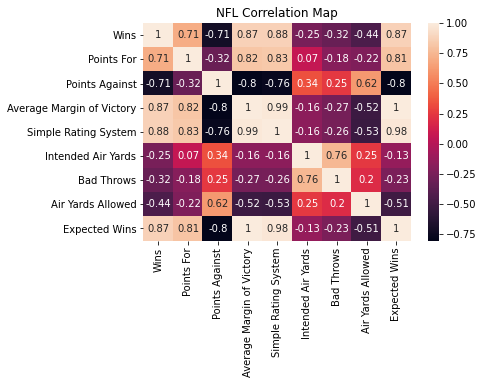

In [18]:
_ = sns.heatmap(main_football_df[['Wins', 'Points For', 'Points Against', 'Average Margin of Victory', 'Simple Rating System', 'Intended Air Yards', 'Bad Throws', 'Air Yards Allowed', 'QB Pressure%', 'Expected Wins']].corr(), annot=True)
_ = plt.title("NFL Correlation Map")


In looking at this heatmap, there are some interesting correlations I will expand upon this in my paper, but I wanted to mention the 0.87 correlation between Wins and Expected Wins. While 0.87 correlation is fairly high, you would expect a stronger correlation between the number of wins a teams has and expected wins, especially in a short season (16 games).

However, our dataset is rather large, so I created second heatmap to compare wins and expected wins with other variables that could have interesting correlations. 

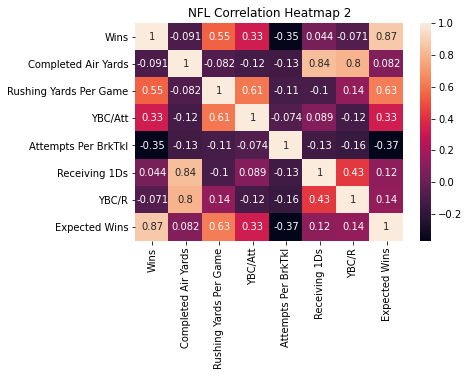

In [19]:
_ = sns.heatmap(main_football_df[['Wins', 'Completed Air Yards', 'Bad Throw %', 'OnTgt%', 'Rushing Yards Per Game', 'YBC/Att', 'Attempts Per BrkTkl', 'Receiving 1Ds', 'YBC/R', 'Expected Wins']].corr(), annot=True)
_ = plt.title("NFL Correlation Heatmap 2")

#In looking at the correlation's between wins/expected wins and other statistics, we can see that there was a higher correlation between wins/expected wins and rushing statistics instead of receiving statistics giving us reason to believe rushing may be an important factor in a team's success


Now, to look for the variables that are the strongest predictors of expected wins, we will run 6 regression models using the statistical package Pingouin.

In [20]:
model1 = pg.linear_regression(main_football_df[['Simple Rating System', 'Air Yards Allowed']], main_football_df['Expected Wins']) #We use 2 key variables from Heatmap 1. I didn't include points for, points against or average margin of victory because they are strongly correlated with the Simple Rating System and could cause multicollinearity
model1

#With an adjusted R Squared of 0.95, this is model is extremely strong. With a p-value well below 0, Simple Rating System is a very strong predictor of expected wins. However, this is not surprising because the Simple Rating System and Expected wins are comprised of si

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.818814,0.736999,10.608982,1.697435e-11,0.955067,0.951968,6.311481,9.326147
1,Simple Rating System,0.386212,0.018190,21.231688,3.230276e-19,0.955067,0.951968,0.349008,0.423415
2,Air Yards Allowed,0.000065,0.000320,0.202196,8.411755e-01,0.955067,0.951968,-0.000591,0.000720


In [21]:
model2 = pg.linear_regression(main_football_df[['Rushing Yards Per Game', 'Attempts Per BrkTkl']], main_football_df['Expected Wins'])
model2

#With an adjusted R Squared of 0.45, this model is moderately strong. Both Attempts Per BrkTkl and Rushing yards Per Game have p-values below 0.05, which means these are strong predictors of expected wins. From this, we can have an idea that the run game is still a key part of the NFL.

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.557412,2.037082,2.237226,0.033122,0.486783,0.451388,0.391112,8.723712
1,Rushing Yards Per Game,0.064522,0.014471,4.458822,0.000114,0.486783,0.451388,0.034926,0.094118
2,Attempts Per BrkTkl,-0.192548,0.086131,-2.235527,0.033246,0.486783,0.451388,-0.368705,-0.016390


In [22]:
model3 = pg.linear_regression(main_football_df[['Passing Attempts', 'Completed Air Yards Per Attempt','Bad Throws', 'Passes On Target']], main_football_df['Expected Wins'])
model3

#This model has an adjusted R squared of 0.34, showing it's an average to subpar model. However, we can see from this model that some variables are strong predictors of expected wins, like Passing Attempts (negative coefficient), Bad Throws and Passes on Target. However, this data tells us that less pass attempts are better. A possible indication that passing is actually detrimental to a team

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,5.965075,4.521247,1.319343,0.198134,0.344006,0.246822,-3.311757,15.241907
1,Passing Attempts,-0.114473,0.039078,-2.929373,0.006827,0.344006,0.246822,-0.194654,-0.034292
2,Completed Air Yards Per Attempt,1.126197,0.735620,1.530949,0.137416,0.344006,0.246822,-0.383171,2.635564
3,Bad Throws,0.124857,0.057865,2.157723,0.040009,0.344006,0.246822,0.006127,0.243586
4,Passes On Target,0.124463,0.044074,2.823951,0.008805,0.344006,0.246822,0.034031,0.214896


In [23]:
model4 = pg.linear_regression(main_football_df[['Rushing Attempts', 'Rushing Yds', 'YBC/Att']], main_football_df['Expected Wins'])
model4

#This model had an adjusted R squared of about 0.41 which means this an average model. After looking at three more rushing statistics, only rushing attempts has a p-value below 0.05. We still have reason to believe that rushing statistics are reasonably good predictors of expected wins in the NFL.

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-9.806235,4.390668,-2.233426,0.033690,0.471401,0.414766,-18.800112,-0.812358
1,Rushing Attempts,0.050613,0.016994,2.978256,0.005927,0.471401,0.414766,0.015802,0.085424
2,Rushing Yds,-0.002916,0.002523,-1.155874,0.257501,0.471401,0.414766,-0.008085,0.002252
3,YBC/Att,0.828107,1.123177,0.737290,0.467080,0.471401,0.414766,-1.472617,3.128830


In [24]:
model5 = pg.linear_regression(main_football_df[['Rec', 'Receiving Yards', 'Receiving TDs', 'YBC/R', 'Drop']], main_football_df['Expected Wins'])
model5

#This model has an adjusted R squared of 0.47, which means like most models it's average. However, 3 of the 5 variables (Rec, Receiving TDs, YBC/R) are strong predictors of Expected Wins (due to a p-value below 0.05). And the other 2 variables, Receiving Yards and Drop, have reasonably p-values of 0.12 and 0.06 respectively. 
#However, receptions and YBC/R have negative coefficients showing that more completions are a bad thing as oppossed to less but longer pass plays.

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.683957,4.671728,1.644778,0.112054,0.558382,0.473456,-1.918917,17.286830
1,Rec,-0.045363,0.019866,-2.283520,0.030814,0.558382,0.473456,-0.086198,-0.004529
2,Receiving Yards,0.002996,0.001844,1.624366,0.116361,0.558382,0.473456,-0.000795,0.006787
3,Receiving TDs,0.415819,0.083615,4.973041,0.000036,0.558382,0.473456,0.243947,0.587691
4,YBC/R,-1.543633,0.662684,-2.329365,0.027878,0.558382,0.473456,-2.905799,-0.181466
5,Drop,0.128748,0.064576,1.993752,0.056768,0.558382,0.473456,-0.003989,0.261485


In [25]:
model6 = pg.linear_regression(main_football_df[['Blitzes', 'QB Hurries','QB Pressures', 'QB Knockdowns', 'Missed Tackles']], main_football_df['Expected Wins'])
model6

#This model has an adjusted R squared of 0.3, which means this is a subpar model. While most variable don't seem to be predictors, missed tackles have a p-value of 0.04, and a negative coefficient. Basically, our model says that less missed tackles will lead to more expected wins

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,10.142508,4.282849,2.368169,0.025594,0.302656,0.168552,1.338987,18.946030
1,Blitzes,0.012154,0.009548,1.272949,0.214301,0.302656,0.168552,-0.007472,0.031780
2,QB Hurries,-0.062952,0.096708,-0.650944,0.520795,0.302656,0.168552,-0.261738,0.135835
3,QB Pressures,0.072172,0.068580,1.052375,0.302310,0.302656,0.168552,-0.068797,0.213142
4,QB Knockdowns,-0.118869,0.106555,-1.115561,0.274815,0.302656,0.168552,-0.337896,0.100159
5,Missed Tackles,-0.053782,0.025452,-2.113073,0.044350,0.302656,0.168552,-0.106099,-0.001465


Finally, I will make my own difficult points system using the rankings from important variables I have discussed from throughout my model. I will gather the rank from each variable and give a team points for whether they are highest or lowest. Some variables, like missed tackles, it's better to have less, so ascending=False so the team with the least amount of missed tackles are benefited. Meawhile for positive statistis like Rushing Yards Per Game, ascending=True, so that teams with higher statistics will be benefited.

In [26]:
expected_wins_points = main_football_df['Expected Wins'].rank(ascending=True)  #receptions, YBC/R, Drop
rushing_yards_per_game = main_football_df['Rushing Yards Per Game'].rank(ascending=True)
attempts_per_brktkl = main_football_df['Attempts Per BrkTkl'].rank(ascending=False)
rushing_attempts = main_football_df['Rushing Attempts'].rank(ascending=True)
receptions = main_football_df['Rec'].rank(ascending=False)
drop = main_football_df['Drop'].rank(ascending=False)
YBC_r = main_football_df['YBC/R'].rank(ascending=False)
missed_tackles = main_football_df['Missed Tackles'].rank(ascending=False)
pass_attempts = main_football_df['Passing Attempts'].rank(ascending=False)

After creating the ranks for each important statistic, I created a new column, "Final Rankings", and add each variable too it. After I finish, I create another column, so we can see the rank for my Final Rankings column (so it's easier to compare teams and scores). Finally, we print the new dataframe.

In [27]:
main_football_df['Final Rankings'] = expected_wins_points + rushing_yards_per_game + attempts_per_brktkl + rushing_attempts + receptions + drop + YBC_r + missed_tackles + pass_attempts

main_football_df['Ranking Final Rankings'] = main_football_df['Final Rankings'].rank(ascending=False)
main_football_df

,Tm,Wins,Losses,Ties,Win %,Points For,Points Against,Point Differential,Average Margin of Victory,Strength of Schedule,...,QB Hurry %,QB Knockdowns,QB Knockdown%,Sacks,QB Pressures,QB Pressure%,Missed Tackles,Expected Wins,Final Rankings,Ranking Final Rankings
0,New England Patriots,12,4,0,0.750,420,225,195,12.2,-1.8,...,9.60%,41,7.60%,47,146,24.10%,66,13.031338,160.5,13.0
1,Buffalo Bills,10,6,0,0.625,314,259,55,3.4,-1.3,...,9.40%,41,7.40%,44,143,23.30%,132,9.794477,170.5,11.0
2,New York Jets,7,9,0,0.438,276,359,-83,-5.2,-1.1,...,7.70%,52,8.90%,35,137,21.10%,96,5.585140,136.5,20.0
3,Miami Dolphins,5,11,0,0.313,306,494,-188,-11.8,0.2,...,6.10%,37,6.80%,23,95,16.50%,115,3.891502,47.5,32.0
4,Baltimore Ravens,14,2,0,0.875,531,282,249,15.6,0.1,...,7.30%,59,10.80%,37,140,23.40%,93,13.080872,235.5,1.0
5,Pittsburgh Steelers,8,8,0,0.500,289,303,-14,-0.9,1.2,...,11.80%,56,10.90%,54,180,30.50%,106,7.552007,143.5,18.0
6,Cleveland Browns,6,10,0,0.375,335,393,-58,-3.6,1.7,...,10.70%,38,7.40%,38,138,23.80%,140,6.504054,131.0,22.0
7,Cincinnati Bengals,2,14,0,0.125,279,420,-141,-8.8,1.5,...,8.90%,48,9.60%,31,129,22.90%,109,4.399901,105.5,28.0
8,Houston Texans,10,6,0,0.625,378,385,-7,-0.4,1.0,...,6.80%,42,7.20%,31,117,18.10%,115,7.826078,171.0,10.0
9,Tennessee Titans,9,7,0,0.563,402,331,71,4.4,-1.0,...,10.70%,27,4.50%,43,142,21.10%,110,9.810394,201.0,5.0
